# Understanding NLP & Sentiment Analysis in Yelp Review Data

## Natural Language Processing

- Is a field that is at the intersection of Computer science, Computational lingustics and Artificial Intelligence that allows a computer program to understand human speech as it is spoken.
- focuses on the interactions between human language and computers.
- Allows machine to understand how human speak.
- Is used for sentiment analysis, topic extraction,speech tagging, relationship extraction, stemming
- Is a very hard filed as human's speeches are not precisely stated.

### Preprocessing and Understanding Text

- Since texts come as one of the most structureless data, it is more than crucial to make it usable. This is commonly known as pre-processing it.
- To palliate to that one can must:
    * Remove noise from the text.
    * Normalize the text.(stemming, lemmatizing, changing characters to 
    lower cases,expanding abbreviations, removing stopwords
    * Standarize the text. (In general, via the use of regular expression)

The above cited approaches fall into the text pre-processing stage. At this stage, one should remember that the text should be transformed into features so that the machine learning algorithms can really digest it. For, the commonly used techniques are:
    * N-grams - constits at forming combinations of N words
    * Statistical features( Terme frequency and inverse document frequence
    * Syntactic Parsing - Syntactic parsing, then, is the task of recognizing sentence and 
    assigning a syntactic structure to it.
    * Entity extraction - Defining or making the most important parts of a sentence. 
    * Word Embedding - aims at transforming high dimensional words as lower dimensional 
    vectors.

#### NLP is mainly based on:
- Tokens are words present in a text
- Tokenization which can be defined as the process of converting a text into tokens
- Text Sentence can be looked at as the paragraphs, sentences and words that are present in a given text

#### Words!
- In a natural language processing, words come into two forms:
    - inflections :
        - Adding a suffix to the word does not change its grammatical category. 
            - Plural with nouns
    - derivations :
        - Adding a suffix to the word does change its grammatical category.
            - beauty ---- beautiful, nation--- national

In [ ]:
#sentence Tokenize: sent_tokenize()
#word tokenize:
#Part of Speech tagging: pos_tag()
#stemming(word root) nltk.stem import SnowballStemmer stem() - finds linguistic basis of word
#lemmatization: nltk.stem import WordNetLemmatizer - finds conceptual basis of word
#Named Entity Recognizer: nltk.tag.stanford import NERTagger - classify text elements into pre-defined categories
#spelling correction correct()
#translation and language detection:  from langdetect import detect - detect()
#Text Blob .detect_language() .translate()
#TF-IDF is term frequency inverse document frequency: term freq = # of times word in document, doc freq = # of docs word is in


In [1]:
!pip install nltk

### Word Tokenization

In [1]:
import nltk
from nltk.util import ngrams

In [2]:
from nltk.tokenize import word_tokenize
word_tokenize("Hello world")

['Hello', 'world']

In [7]:
text = "I am aware that nltk only offers bigrams and trigrams, but is there a way to split my text in four-grams, five-grams or even hundred-grams"
tokenize = nltk.word_tokenize(text)
print(tokenize)

['I', 'am', 'aware', 'that', 'nltk', 'only', 'offers', 'bigrams', 'and', 'trigrams', ',', 'but', 'is', 'there', 'a', 'way', 'to', 'split', 'my', 'text', 'in', 'four-grams', ',', 'five-grams', 'or', 'even', 'hundred-grams']


In [8]:
import nltk
# word_tokenize is used to find the list of words in strings
text = nltk.word_tokenize("PierreVinke, 59 years old, will join as a nonexecutive director on Nov . 29.")
print(text) 

['PierreVinke', ',', '59', 'years', 'old', ',', 'will', 'join', 'as', 'a', 'nonexecutive', 'director', 'on', 'Nov', '.', '29', '.']


If there are any missing nltk modules, (nlt.xxxx), call nltk.download()

You can either download the missing modules individually, or download all packages

### What is the difference between split and world_tokenize?

In [6]:
message = 'I am Sidy danioko, from west africa'
message.split()

['I', 'am', 'Sidy', 'danioko,', 'from', 'west', 'africa']

In [7]:
word_tokenize(message) # word tokenize tokenisizes by word

['I', 'am', 'Sidy', 'danioko', ',', 'from', 'west', 'africa']

In [8]:
word_tokenize("This's a car")

['This', "'s", 'a', 'car']

### Sentence Tokenization

In [9]:
import nltk
from nltk.tokenize import sent_tokenize
# sent_tokenize tokenizes by sentences. It is used to find the list of sentences 
text="Welcome readers. I hope you find it interesting. Please do reply"
print(sent_tokenize(text))

['Welcome readers.', 'I hope you find it interesting.', 'Please do reply']


### TreeBankWordTokenizer

In [11]:
# Treebank tokenizer uses regular expressions to tokenize texts
# Assums that the text has already been segmented into sentences via the use of sent_tokenize()
# split standard contractions exp she's - 'she', 's', she'll- 'she','ll'
# looks at puctuactions as separate tokens
# splits off commas and single quotes, whenver they are followed by whitespace
# separate periods that appear at the end of line

In [44]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
# Treebank tokenizer uses regualar expressions to tokenize text
tokenizer = TreebankWordTokenizer()
print (tokenizer.tokenize("Have a nice day. I hope you find the book interesting."))
print (tokenizer.tokenize("Don't hesitate to ask questions"))
print (tokenizer.tokenize(" I want to by this pen for $44.15"))
print (tokenizer.tokenize(" Hello,I am sidy"))

['Have', 'a', 'nice', 'day.', 'I', 'hope', 'you', 'find', 'the', 'book', 'interesting', '.']
['Do', "n't", 'hesitate', 'to', 'ask', 'questions']
['I', 'want', 'to', 'by', 'this', 'pen', 'for', '$', '44.15']
['Hello', ',', 'I', 'am', 'sidy']


### WordPunctTokenizer

In [13]:
# This tokenizes a text into a sequence of alphabetic and non-alphabetic
# characters, using regular exopression

In [14]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
print (tokenizer.tokenize("Don't hesitate to ask questions"))

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']


### RegexpTokenizer

In [15]:
# This split a string into substrings using a regualr expression

In [16]:
import nltk
from nltk.tokenize import RegexpTokenizer
sent = "She secures 90.56% in class X.  She is a meritorious student. Go "
capt = RegexpTokenizer('[A-Z]\w+')
capt.tokenize(sent)

['She', 'She']

In [1]:
# write a function that takes a text and give the index of similar consecutive word
def adj_location(text,target):
    splitted = text.split()
    for n in range(len(splitted)-1):
        if splitted[n]== target and splitted[n+1]== target:
            print (n,n+1)

In [4]:
adj_location('I am sidy sidy sidy sidy is nice','sidy')

2 3
3 4
4 5


In [ ]:
def adj_location(text):
    splitted = text.split()
    for i in range(len(splitted)-1):
        if splitted[i]== splitted[i+1]:
            print(splitted[i],i,i+1)
            print(i,i+1,splitted[i])

In [2]:
def count(text):
    splitted = text.split()
    d = {}
    for elem in splitted:
        if elem in d:
            d[elem]+=1
        else:
            d[elem]=1
    return(d)

In [3]:
text = ' I am a Ndeye from senegal. I am not crazy'

In [4]:
count(text)

{'I': 2,
 'Ndeye': 1,
 'a': 1,
 'am': 2,
 'crazy': 1,
 'from': 1,
 'not': 1,
 'senegal.': 1}

In [7]:
s = """ Google Analytics is very very very nice (now)
By Jason Hoffman 18 August 06
Google Analytics, the result of Google’s acquisition of the San
Diego-based Urchin Software Corporation, really really opened its
doors to the world a couple of days ago, and it allows you to
track up to 10 sites within a single google account.
"""

In [50]:
adj_location(s,'very')

3 4
4 5


In [52]:
adj_location(s,'o')

In [53]:
import nltk
nltk.re_show('very very',s)

Google Analytics is {very very} very nice (now)
By Jason Hoffman 18 August 06
Google Analytics, the result of Google’s acquisition of the San
Diego-based Urchin Software Corporation, really really opened its
doors to the world a couple of days ago, and it allows you to
track up to 10 sites within a single google account.


In [54]:
nltk.re_show('o+',s)

G{oo}gle Analytics is very very very nice (n{o}w)
By Jas{o}n H{o}ffman 18 August 06
G{oo}gle Analytics, the result {o}f G{oo}gle’s acquisiti{o}n {o}f the San
Dieg{o}-based Urchin S{o}ftware C{o}rp{o}rati{o}n, really really {o}pened its
d{oo}rs t{o} the w{o}rld a c{o}uple {o}f days ag{o}, and it all{o}ws y{o}u t{o}
track up t{o} 10 sites within a single g{oo}gle acc{o}unt.


In [55]:
nltk.re_show('oo+',s)

G{oo}gle Analytics is very very very nice (now)
By Jason Hoffman 18 August 06
G{oo}gle Analytics, the result of G{oo}gle’s acquisition of the San
Diego-based Urchin Software Corporation, really really opened its
d{oo}rs to the world a couple of days ago, and it allows you to
track up to 10 sites within a single g{oo}gle account.


In [56]:
import nltk
from nltk.tokenize import BlanklineTokenizer
sent = '''She secures

90.56% in class X.  

She is a meritorious student'''
BlanklineTokenizer().tokenize(sent)

['She secures', '90.56% in class X.', 'She is a meritorious student']

### Stemmer & Lemmatizer
- Stemmer and lemmatizer are two methods to handle inflections. 
- Stemming and lemmatization tend to "normalize" words to their common base form,
- Stemmers aim to remove the morphological affixes from words, leaving only the world stem.
- Lemmatisation is to bring a word to its conventional form as it is a dictionary

### PorterStemming & PorterStemmer
- Porter stemming is an algorithm, a collection of rules that provides ways to better handle English inflections.
- It is a process of removing suffixes from words in english.
- Very important in information retrieval

In [11]:
from nltk.stem import PorterStemmer
stemmerporter = PorterStemmer()

In [12]:
from nltk.stem import PorterStemmer
stemmerporter = PorterStemmer()
print(stemmerporter.stem('talking'))
print (stemmerporter.stem('happiness'))
print (stemmerporter.stem('happy'))
print (stemmerporter.stem('unhappy'))
print (stemmerporter.stem('ran'))
print (stemmerporter.stem('is'))

talk
happi
happi
unhappi
ran
is


In [6]:
inT = [1,2,3,4]
list(map(lambda x: x**2,inT))

[1, 4, 9, 16]

In [7]:
g = lambda x: x**2
[g(elem) for elem in inT]

[1, 4, 9, 16]

In [9]:
words = ['houses', 'trains', 'pens', 'cars', 'eaten','sick', 
         'nice', 'bought', 'selling', 'sized',
           'speech', 'rolling', 'marching', 'identification',
         'universal', 'beautiful', 'references', 'countries',
         'called']

In [ ]:
[burger for burgen in words]

In [13]:
single = [stemmerporter.stem(elem) for elem in words]
print(single)

['hous', 'train', 'pen', 'car', 'eaten', 'sick', 'nice', 'bought', 'sell', 'size', 'speech', 'roll', 'march', 'identif', 'univers', 'beauti', 'refer', 'countri', 'call']


In [3]:
f = lambda x: x**2
list_ints = [1,2,3,4,5,6,7]
list(map(f,list_ints))

[1, 4, 9, 16, 25, 36, 49]

In [4]:
[f(elem) for elem in list_ints]

[1, 4, 9, 16, 25, 36, 49]

In [ ]:
{word: stemmerpoter.stem(word) for word in words}

### LancasterStemmer

In [22]:
import nltk
from nltk.stem import LancasterStemmer
stemmerLan = LancasterStemmer()
print (stemmerLan.stem('happiness'))
print (stemmerLan.stem('happy'))
print (stemmerLan.stem('unhappy'))
print (stemmerLan.stem('ran'))
print (stemmerLan.stem('is'))

happy
happy
unhappy
ran
is


### RegexpStemmer
- Regex is the short of regular expression.
- What is a regular expression?
    - It is a special text string that aims to describe a search pattern
-  Uses regular expressions to identify morphological affixes. As such, a given substring that matches the regular expressions will be automatically removed.


In [23]:
import nltk
from nltk.stem import RegexpStemmer
stemmerreg = RegexpStemmer('ing')
print (stemmerreg.stem('working'))
print (stemmerreg.stem('happiness'))
print (stemmerreg.stem('pairing'))
print(stemmerreg.stem('singde'))

work
happiness
pair


### SnowballStemmer
- It contains 16 stemmer algorithms (Danish,Dutch, English, Finnish, French, German, Hungarian,...)


In [24]:
import nltk
from nltk.stem import SnowballStemmer
print (SnowballStemmer.languages)
spanishstemmer = SnowballStemmer('spanish')
print (spanishstemmer.stem('comiendo'))

frenchstemmer = SnowballStemmer('french')
print (frenchstemmer.stem('manger'))

('danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')
com
mang


In [25]:
frechstemmer = SnowballStemmer('french')
print (frenchstemmer.stem('danser'))

dans


### Lemmatization
- Stands for doing things in the right way based on the use of a vocabulary and that of the morphological analysis of words
- Aims at removing inflectional endings only. Its purposes is to return the base or the directional form of a given word.

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer_output = WordNetLemmatizer()
print (lemmatizer_output.lemmatize('working', pos='v'))
print (lemmatizer_output.lemmatize('ran', pos='v'))
print (lemmatizer_output.lemmatize('took', pos='v'))
print (lemmatizer_output.lemmatize('is', pos='v'))
print (lemmatizer_output.lemmatize('happiness'))
print (lemmatizer_output.lemmatize('took'))

work
run
take
be
happiness
took


### Part of speech tagging

- Tags available at Penn Treebank
- Tagging, also known as grammatical tagging is a process of classifying words in their part of speech and label then accordingly
- exple : 
        - conjoction of coordinations get mapped to cc
        - adverbs get mapped to RB
        - prepositions get mapped to IN
        - something gets mapped to NN
        - adjectives get mapped to jj
        - verbs get mapped to VBZ


In [9]:
ls = [1,2,3,4,5,6,8]
list(filter(lambda x: x%2==0,ls))

[2, 4, 6, 8]

In [ ]:
list(filter(lambda x: len(x) > 4, words))

In [ ]:
list(filter(lambda sidy: sidy[-1]=='s',words))

In [18]:
import nltk
from nltk import word_tokenize
text = word_tokenize("It is a pleasant day today")
nltk.pos_tag(text) #pos_tagger stands for part of speech tagger

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [19]:
list_of_words = nltk.pos_tag(text)

In [20]:
list_of_words

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [22]:
list(filter(lambda x: x[1]=='NN',list_of_words))

[('day', 'NN'), ('today', 'NN')]

In [28]:
text = word_tokenize("They buy the permit in order to be able to attend the event")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('buy', 'VBP'),
 ('the', 'DT'),
 ('permit', 'NN'),
 ('in', 'IN'),
 ('order', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('attend', 'VB'),
 ('the', 'DT'),
 ('event', 'NN')]

In [ ]:
def tag(text,model):
    splitted = text.split()
    tagged = nltk.pos_tag(splitted)
    selected = list(filter(lambda w:w[-1]== model,tagged))
    return(selected)

In [ ]:
tag(t'Sidy is here','NN')

In [29]:
import nltk
from nltk.tag import DefaultTagger
tag = DefaultTagger('He is the man')
tag.tag(['Beautiful', 'morning'])

[('Beautiful', 'He is the man'), ('morning', 'He is the man')]

### Language conversion & Text formatting & Grammar

!pip install --trusted-host pypi.python.org autocorrect

In [ ]:
from autocorrect import spell
spell("Tghe")

### TextBlob
- It is a python library for textual data processing. It provides an interface for common natural language processing tasks.

In [ ]:
!pip install --trusted-host pypi.python.org textblob

In [14]:
from textblob import TextBlob
b = TextBlob("I havv good speling!")
print(b.detect_language())
print (b.correct())

nl
I have good spelling!


In [15]:
from textblob import Word
w = Word('falability')
w.spellcheck()

[('fallibility', 0.3333333333333333),
 ('capability', 0.3333333333333333),
 ('affability', 0.3333333333333333)]

In [16]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [17]:
# language identification
TextBlob('Hola amigos').detect_language()

'es'

In [ ]:
!pip install --trusted-host pypi.python.org langdetect

In [18]:
from langdetect import detect
print (detect("War doesn't show who's right, just who's left."))
print (detect("Ein, zwei, drei, vier"))
print (detect("Eu gosto de mulher"))

en
de
pt


In [19]:
#en_blob = TextBlob(u'Simple is better than complex.')
#en_blob.translate(to='vi') # vi stands for vietnamese
en_blob = TextBlob(u'I am a free black man loved by Jesus Christ.')
en_blob.translate(to='pt')

TextBlob("Eu sou um homem negro livre amado por Jesus Cristo.")

In [23]:
from textblob import Word

In [20]:
blob = TextBlob("ITP is a two-year graduate program located in the Tisch School of the Arts. Perhaps the best way to describe us is as a Center for the Recently Possible.")

In [37]:
blob.sentences
blob.words

[Sentence("ITP is a two-year graduate program located in the Tisch School of the Arts."),
 Sentence("Perhaps the best way to describe us is as a Center for the Recently Possible.")]

In [35]:
for sentence in blob.sentences:
    print (len(sentence))

75
77


In [40]:
print (blob.sentences[1])

Perhaps the best way to describe us is as a Center for the Recently Possible.


In [41]:
print (blob.sentences[1].words)

['Perhaps', 'the', 'best', 'way', 'to', 'describe', 'us', 'is', 'as', 'a', 'Center', 'for', 'the', 'Recently', 'Possible']


In [42]:
for word in blob.sentences[1].words:
    print (len(word))

7
3
4
3
2
8
2
2
2
1
6
3
3
8
8


In [43]:
blob.words

WordList(['ITP', 'is', 'a', 'two-year', 'graduate', 'program', 'located', 'in', 'the', 'Tisch', 'School', 'of', 'the', 'Arts', 'Perhaps', 'the', 'best', 'way', 'to', 'describe', 'us', 'is', 'as', 'a', 'Center', 'for', 'the', 'Recently', 'Possible'])

In [24]:
from textblob import Word
word = Word('Car')
print word.pluralize()

Cars


In [25]:
TextBlob('Sidy is a very nice and inteligent black man').sentiment

Sentiment(polarity=0.3066666666666667, subjectivity=0.7166666666666667)

In [26]:
TextBlob('Beautiful').sentiment

Sentiment(polarity=0.85, subjectivity=1.0)

In [27]:
TextBlob('not beautiful').sentiment

Sentiment(polarity=-0.425, subjectivity=1.0)

In [28]:
# Textblob does not consider words that are made of one letter in the 
# sentiment analysis
print TextBlob('not a good person').sentiment
TextBlob('not good person').sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)


Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [59]:
# One can use to get the frequency of a word or noun phrase via TextBlob
message = TextBlob('Mali is located in west africa.',
                  'Back in the days, Mali is used to be a french colony. '
                  'Now, despite being so called an independent country,\n
                   Mali still depends on france')


In [60]:
message.word_counts['Mali'] # In this way, the search will not be case sensitive. 

0

In [61]:
message.words.count('Mali')

3

In [62]:
# To overcome the case sensitivity, one can specify
message.words.count('Mali', case_sensitive = True)

3

In [63]:
message.words

WordList(['Mali', 'is', 'located', 'in', 'west', 'africa.Back', 'in', 'the', 'days', 'Mali', 'is', 'used', 'to', 'be', 'a', 'french', 'colony', 'Now', 'despite', 'being', 'so', 'called', 'an', 'independent', 'country', 'Mali', 'still', 'depends', 'on', 'france'])

In [64]:
message.words[8].singularize()

'day'

In [65]:
message.words[16].pluralize()

'colonies'

### TF-IDF    Term Frequency - Inverse Document Frequency 
- It is a statistical tool that aims to reflect how much important a word is to a document in a collection or corpus.
- It can be seen as a weighting factor.
- How to generate TF-IDF of phrases of Tokens?
   - by using CountVectorizer(what the hell is this?) then feeding the output of that into TfidfTransformer.
   - by directly inputing the collection of text or documents to TfidfVectorizer 

### What is CountVectorizer?
- It is a technique that allows to:
    * tokenize a collection of text documents.
    * build a vocabulary of known words
    * encode new documents using that vocabulary

- To use CountVectorizer one should:
    * Make an instance(in terms of class) of CountVectorizer
    * Use fit() function so that they can be able to learn a vocabulary from different documents
    * Use transform() function on the available documents, which facilitates the encoding process


### Word Frequencies with TfidfVectorizer
- In the above case, we use the basic word counts that has its own limits.
- Therefore, we need a more robust method to calculate the word frequencies. And, by far, the most commonly used method is TF-IDF
    * TF, which is the short hand for Term Frequency, tells us how often a given word appears within a given document
    * IDF, short hand for Inverse Document Frequency, aims at bringing words that appear alot to the the lower end of the scale 
    
- TF-IDF can be seen as a word frequency scoring technique that searches for words that have more weights. In terms of frequency, we can say words that appear alot in a given ocument but not across documents

#### Extraction of numerical features from texts
- Tokenize strings and  attach an integer, called ID, to each obtained token
- Count the number of times each token appears in a given document
- Normalize over the occurences in the majority of the documents
- In doing so, we should note that the frequency of each token is a FEATURE


### Corpus
- a collection of writen texts or documents

In [ ]:
To vectorize (vectorization) aims at turning a collection of text documents into numerical feature vector

In [ ]:
# Questions?
# what is the difference between fit(), 
#fit() : is used to generate learning model parameters from training data
#transform() : parameters generated from fit() method,applied upon model to
# generate transformed data set.
# fit_transform() : combines fit() and transform() applied on same data sets

In [ ]:
# - fit Learn vocabulary and idf from training set.
# fit_transform Learn vocabulary and idf, return term-document matrix.

In [25]:
import numpy as np
import scipy as sp
import pandas as pd
# we need to import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

simple_train = ['Call you tonight', 'Call me a cab', 'please call me... PLEASE!']

vect=CountVectorizer() # CountVectorizer allows one Convert a collection of text
# documents to a matrix of token count. The outputed matrix is a sparse one. What is
# a sparse matrix?
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
# Take the text or the document and learn the vocabulary
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [ ]:
# we can see that it is not displaying the character a. This is mainly because the default
# Check on this case.

In [2]:
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0) # why does axis have to be zero?
pd.DataFrame(df.reshape(1,6), columns=vect.get_feature_names())
# This is about the document frequency

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [29]:
tf/df # why is that? What is the purpose?

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [30]:
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## CountVectorizer - Fit Transform with NLP

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer  = CountVectorizer(min_df=1) # min_df represents a threshold. Here, it puts a
# constraint by telling while building the vocabulary you need to ignore terms 
# that have a document frequency strictly lower than the given threshold
print (vectorizer)

corpus = ['This is the first document','This is the second second document',
          'And the third one', 'Is this the first document?']

X = vectorizer.fit_transform(corpus)

tf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tf

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,2,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


In [32]:
print (X)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


### ngrams

In [11]:
import nltk
from nltk.util import ngrams

In [11]:
message = 'nltk offers many types of ngrams. Among many others, the ones that \
are used the most are bigrams and trigrams. However, one can go ten grams,\
hundred and even thousand grams depending on what they are trying to go'

In [12]:
message

'nltk offers many types of ngrams. Among many others, the ones that are used the most are bigrams and trigrams. However, one can go ten grams,hundred and even thousand grams depending on what they are trying to go'

In [16]:
# Let's tokenize this
my_tokens = nltk.word_tokenize(message)
#tokenize

In [20]:
# Let's create my bigrams
bigrams = ngrams(my_tokens,2)
list(bigrams)

[('nltk', 'offers'),
 ('offers', 'many'),
 ('many', 'types'),
 ('types', 'of'),
 ('of', 'ngrams'),
 ('ngrams', '.'),
 ('.', 'Among'),
 ('Among', 'many'),
 ('many', 'others'),
 ('others', ','),
 (',', 'the'),
 ('the', 'ones'),
 ('ones', 'that'),
 ('that', 'are'),
 ('are', 'used'),
 ('used', 'the'),
 ('the', 'most'),
 ('most', 'are'),
 ('are', 'bigrams'),
 ('bigrams', 'and'),
 ('and', 'trigrams'),
 ('trigrams', '.'),
 ('.', 'However'),
 ('However', ','),
 (',', 'one'),
 ('one', 'can'),
 ('can', 'go'),
 ('go', 'ten'),
 ('ten', 'grams'),
 ('grams', ','),
 (',', 'hundred'),
 ('hundred', 'and'),
 ('and', 'even'),
 ('even', 'thousand'),
 ('thousand', 'grams'),
 ('grams', 'depending'),
 ('depending', 'on'),
 ('on', 'what'),
 ('what', 'they'),
 ('they', 'are'),
 ('are', 'trying'),
 ('trying', 'to'),
 ('to', 'go')]

In [23]:
# Let's create my trigrams
my_tri_grams = ngrams(my_tokens,3)
list(my_tri_grams)

[('nltk', 'offers', 'many'),
 ('offers', 'many', 'types'),
 ('many', 'types', 'of'),
 ('types', 'of', 'ngrams'),
 ('of', 'ngrams', '.'),
 ('ngrams', '.', 'Among'),
 ('.', 'Among', 'many'),
 ('Among', 'many', 'others'),
 ('many', 'others', ','),
 ('others', ',', 'the'),
 (',', 'the', 'ones'),
 ('the', 'ones', 'that'),
 ('ones', 'that', 'are'),
 ('that', 'are', 'used'),
 ('are', 'used', 'the'),
 ('used', 'the', 'most'),
 ('the', 'most', 'are'),
 ('most', 'are', 'bigrams'),
 ('are', 'bigrams', 'and'),
 ('bigrams', 'and', 'trigrams'),
 ('and', 'trigrams', '.'),
 ('trigrams', '.', 'However'),
 ('.', 'However', ','),
 ('However', ',', 'one'),
 (',', 'one', 'can'),
 ('one', 'can', 'go'),
 ('can', 'go', 'ten'),
 ('go', 'ten', 'grams'),
 ('ten', 'grams', ','),
 ('grams', ',', 'hundred'),
 (',', 'hundred', 'and'),
 ('hundred', 'and', 'even'),
 ('and', 'even', 'thousand'),
 ('even', 'thousand', 'grams'),
 ('thousand', 'grams', 'depending'),
 ('grams', 'depending', 'on'),
 ('depending', 'on', 'wha

In [ ]:
# Similar things could have been done for 4,5,6 grams

In [24]:
# One could have written a function and find the ngrams
def ngrams_constructor(text,n):
    return ngrams(text.split(),n)

In [26]:
biGram = ngrams_constructor('Sidy is a a free black man loved by Jesus Chris',2)

In [28]:
list(biGram)

[('Sidy', 'is'),
 ('is', 'a'),
 ('a', 'a'),
 ('a', 'free'),
 ('free', 'black'),
 ('black', 'man'),
 ('man', 'loved'),
 ('loved', 'by'),
 ('by', 'Jesus'),
 ('Jesus', 'Chris')]

In [29]:
triGram = ngrams_constructor('Sidy is a a free black man loved by Jesus Chris',3)

In [30]:
list(triGram)

[('Sidy', 'is', 'a'),
 ('is', 'a', 'a'),
 ('a', 'a', 'free'),
 ('a', 'free', 'black'),
 ('free', 'black', 'man'),
 ('black', 'man', 'loved'),
 ('man', 'loved', 'by'),
 ('loved', 'by', 'Jesus'),
 ('by', 'Jesus', 'Chris')]

In [50]:
# Textblob does not consider words that are made of one letter in the 
# sentiment analysis
print TextBlob('not a good person').sentiment
TextBlob('not good person').sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)


Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [22]:
# language identification
TextBlob('Hola amigos').translate(from_lang='auto', to='en')

TextBlob("Hello friends")

In [ ]:
# The polarity of a word is always between -1 and 1
# Subejctivity is between 0 and 1

# Yelp review analysis

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

In [31]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [32]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [38]:
mean_by_group = yelp.groupby('stars').mean()
mean_by_group

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


In [39]:
mean_by_group.corr()

,cool,useful,funny
cool,1.000000,-0.743329,-0.944939
useful,-0.743329,1.000000,0.894506
funny,-0.944939,0.894506,1.000000


In [40]:
#create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

yelp_best_worst.reset_index(drop=True, inplace=True) # reset the indices. And instead of 
# creating another data frame, let's just do it inplace

x = yelp_best_worst.text #reviews
y = yelp_best_worst.stars #ratings
# print x to look at x
# print y to take a look at
print (x.shape)

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

(4086L,)


In [41]:
print x

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
3       General Manager Scott Petello is a good egg!!!...
4       Drop what you're doing and drive here. After I...
5       Nobuo shows his unique talents with everything...
6       The oldish man who owns the store is as sweet ...
7       Wonderful Vietnamese sandwich shoppe. Their ba...
8       They have a limited time thing going on right ...
9       okay this is the best place EVER! i grew up sh...
10      This place shouldn't even be reviewed - becaus...
11      first time my friend and I went there... it wa...
12      U can go there n check the car out. If u wanna...
13      I love this place! I have been coming here for...
14      I love love LOVE this place. My boss (who is i...
15      Disclaimer: Like many of you, I am a sucker fo...
16      Disgusting!  Had a Groupon so my daughter and ...
17      Never 

In [42]:
x[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Tokenization

In [21]:
# use CountVetorizer to create document-term matrices from x_train and x_test
vect = CountVectorizer()
#Tokenize the documents and count the occurrences of token and 
#return them as a sparse matrix
x_train_dtm = vect.fit_transform(x_train) # learn the vocabulary dictionary ad create term document matrix
print (x_train_dtm)
#print (x_train_dtm.shape)
x_test_dtm= vect.transform(x_test)
#print x_test_dtm
#x_test_dtm.shape

  (0, 5773)	1
  (0, 10362)	2
  (0, 12465)	1
  (0, 10069)	1
  (0, 10180)	1
  (0, 16612)	2
  (0, 4631)	1
  (0, 9578)	1
  (0, 15093)	1
  (0, 11186)	1
  (0, 136)	1
  (0, 4809)	1
  (0, 15136)	1
  (0, 10413)	2
  (0, 16195)	1
  (0, 15834)	1
  (0, 12514)	2
  (0, 2789)	1
  (0, 14838)	1
  (0, 10286)	2
  (0, 3679)	1
  (0, 15032)	2
  (0, 1018)	1
  (0, 2286)	2
  (0, 1003)	1
  :	:
  (3063, 2312)	1
  (3063, 9318)	1
  (3063, 879)	1
  (3063, 10352)	2
  (3063, 15968)	1
  (3063, 7181)	1
  (3063, 15042)	1
  (3063, 5333)	1
  (3063, 8189)	2
  (3063, 1548)	1
  (3063, 9807)	1
  (3063, 2818)	1
  (3063, 2735)	1
  (3063, 14836)	1
  (3063, 6718)	1
  (3063, 16599)	1
  (3063, 6974)	1
  (3063, 14137)	1
  (3063, 5139)	1
  (3063, 4538)	1
  (3063, 10805)	1
  (3063, 14994)	1
  (3063, 9438)	1
  (3063, 16162)	1
  (3063, 6616)	1


In [22]:
print x_test

1607    Looking a cutting edge, wanting the best for e...
3409    Greatness in the form of food, just like the o...
1751    The Flower Studio far exceeded my expectations...
2275        So yummy! Strange combination but great place
230     I've been hearing about these cheesecakes from...
902     This has to be the worst restaurant in terms o...
1865    I ate at Scramble last Friday and I have to sa...
636     We decided to eat here on a whim. My husband g...
2625    I LOVE BURRITO EXPRESS. My fiance has been goi...
943     Just open.  I had the roast beef sandwich and ...
1171    Cute busy place in Central Phoenix. Not hiding...
1247    I'm a big fan of Silver Mine. I have been for ...
200     I have now visited Herb n' Flavors several tim...
891     I love to come here from time to time when I'm...
443     Went to Fatburger with our family tonight and ...
2497    This review pertains to carnitas, and as such ...
1673    TIP #1 to Mesa-Gateway fliers: This is the ONL...
745     If you

In [23]:
tf = pd.DataFrame(x_train_dtm.toarray(), columns=vect.get_feature_names())
tf.head()

,00,000,00a,00am,00pm,01,02,03,03342,04,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x_train.head()

2790    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\n...
725     My husband and I absolutely LOVE this restaura...
1578    We went today after lunch. I got my usual of l...
282     Totally dissapointed.  I had purchased a coupo...
2024    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

In [25]:
#don't lowercase
vect = CountVectorizer(lowercase=False)
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm.shape

(3064, 20838)

In [26]:
# include 1-grams and 2-grams (an n-gram is N-grams is just all combinations of adjacent words 
# or letters of length n that you can find in your source text)
vect = CountVectorizer(ngram_range=(1,2))
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm.shape

(3064, 169847)

In [27]:
print (vect.get_feature_names()[-50:]) # The last 50 words

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


## Predict the star rating

In [28]:
vect = CountVectorizer()

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

# Questions?
# what is the difference between f
#fit() : is used to generate learning model parameters from training data
#transform() : parameters generated from fit() method,applied upon model to
# generate transformed data set.
# fit_transform() : combines fit() and transform() api on same data sets

#Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)
y_pred_class = nb.predict(x_test_dtm)

print (metrics.accuracy_score(y_test, y_pred_class))

0.918786692759


# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1-y_test_binary.mean())

In [29]:
#define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print ('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [30]:
#include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

('Features: ', 169847)
('Accuracy: ', 0.85420743639921726)


In [31]:
vect = CountVectorizer()
tokenize_test(vect)

('Features: ', 16825)
('Accuracy: ', 0.91878669275929548)


## Stopword removal
- Stopwords are used words that are widely used in a language.
- To find the list of stopwords in a given language, one can easily type 
    - import nltk
    - from nltk.corpus import stopwords
    - set(stopwords.words('the language = 'english', ;french'))

In [ ]:
# Let's suppose that you have obtain the set of stopwords. And suppose
# that you want to add something new into the your list words. To do so,
# write a function that will allow you achieve your goals.


In [ ]:
# one can respond to this in two ways. Let's
my_test_corpus = 'I am a Sidy. A free black man. Believe it or not; it is true'
# Do it by words and by sentences

In [32]:
#remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

('Features: ', 16528)
('Accuracy: ', 0.91585127201565553)


In [33]:
# set of stop words
print (vect.get_stop_words())

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

In [34]:
#max_features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

('Features: ', 100)
('Accuracy: ', 0.86986301369863017)


In [35]:
print(vect.get_feature_names())

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'clean', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', 

In [36]:
#From here
vect = CountVectorizer(ngram_range=(1,2), max_features=100000)
tokenize_test(vect)

('Features: ', 100000)
('Accuracy: ', 0.88551859099804309)


In [37]:
#min_df sets the minimum document frequency allowed when creating vocab
vect = CountVectorizer(ngram_range=(1,2), min_df=2)
tokenize_test(vect)

('Features: ', 43957)
('Accuracy: ', 0.93248532289628183)


# TextBlob
- is a Python (2 and 3) library for processing textual data.

In [38]:
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [39]:
review = TextBlob(yelp_best_worst.text[0])

In [40]:
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [41]:
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [42]:
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

# Stemming and lemmatization

In [43]:
stemmer = SnowballStemmer('english')
print ([stemmer.stem(word) for word in review.words])

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

In [44]:
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'wa', 'excellent', 'The', 'weather', u'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', u'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', u'egg', 'vegetabl

In [45]:
#assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

In [46]:
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower() #Python 2
    #text = text.lower() #Python 3
    words = TextBlob(text).words
    #return [word.lemmatize() for word in words]
    return [stemmer.stem(word) for word in words]

In [47]:
#split review text into lemmas rather than into words (default)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

('Features: ', 13273)
('Accuracy: ', 0.92465753424657537)


In [48]:
print (vect.get_feature_names()[-50:])

[u'yuuuuummmmmyyi', u'yuuuuuuum', u'yuyuyummi', u'yuzu', u'z', u'z-grill', u'z11', u'zach', u'zam', u'zanella', u'zankou', u'zappo', u'zatsiki', u'zen', u'zen-lik', u'zero', u'zero-star', u'zest', u'zexperi', u'zha', u'zhou', u'zia', u'zilch', u'zin', u'zinburg', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipp', u'zipper', u'ziti', u'zoe', u'zombi', u'zone', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel-kr\xe4ut', u'zzed', u'\xe9clair', u'\xe9cole', u'\xe9m']


# Using TF-IDF to summarize a Yelp review

In [49]:
#create a document-term matrix using TF-ID
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28881)

In [50]:
def summarize():
    
    #choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.text[review_id], 'utf-8') #Python 2
        #review_text = str(yelp.text[review_id]) #Python3
        review_length = len(review_text)
        
    #create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
    #print words with the top 5 TF-IDF scores
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)
        
    #print the review
    print ('\n' + review_text) 

In [51]:
summarize()

TOP SCORING WORDS:
bowl
smashing
soba
circus
facing

I freakin love this place. My favorite thing is to sit and eat facing the counter and watch new people come in and get all confused. Now that's just funny. My first time I was the same way, like what the hell do I do here. Now I'm a pro. Stack it deep and use another bowl for smashing, Soba noodles piled so high it looks like a circus act getting the bowl to the cook. Mmmm....good.


# Sentiment Analysis

In [52]:
print (review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [54]:
max_i = 0
max_polarity = -float('inf')

min_i = 0
min_polarity = float('inf')

for i in range(len(yelp_best_worst.text)):
    review_text = unicode(yelp_best_worst.text[i], 'utf-8') #Python 2
    #review_text = str(yelp_best_worst.text[i]) #Python3
    this_polarity = TextBlob(review_text).sentiment.polarity
    
    if this_polarity > max_polarity:
        max_i = i
        max_polarity = this_polarity
        
    if this_polarity < min_polarity:
        min_i = i
        min_polarity = this_polarity

print (TextBlob(yelp_best_worst.text[max_i]))
print (TextBlob(yelp_best_worst.text[min_i]))

Our server Gary was awesome. Food was amazing...an experience.
This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!


In [55]:
#polarity ranges from -1 (most negative) to 1 (most positive)
print(review.sentiment.polarity)
print(max_polarity)
print(min_polarity)

0.402469135802
1.0
-1.0


In [56]:
#understanding the apply method
yelp['length'] = yelp.text.apply(len)

In [57]:
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


In [77]:
#define a function that accepts text and returns polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity #Python 2
    #return TextBlob(text).sentiment.polarity Python 3

In [78]:
#create a new DataFrame column for sentiment
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

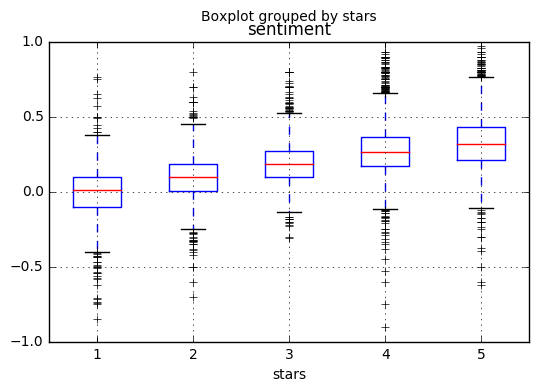

In [79]:
yelp.boxplot(column='sentiment', by='stars')